# MILESTONE 1

---

Andik Al Fauzi - FTDS-RMT-018


In [ ]:
# Data Source URL

# https://data.jakarta.go.id/dataset/data-jumlah-penduduk-provinsi-dki-jakarta-berdasarkan-kelompok-usia-per-kelurahan/resource/ca453aa5408a22f21da60d0b30d85dda

In [ ]:
# Tableu Dashboard

# https://public.tableau.com/views/h8dsft_Milestone1_Andik_Al_Fauzi/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Problem Statement Background

---



> Data tersaji berikut adalah data `Jumlah Penduduk Provinsi DKI Jakarta berdasarkan Usia per Kelurahan`.
Topik Utama yang akan dijabarkan kemudian adalah `Bagaimana Penyebaran Rentang Usia Produktif yaitu antara 15-64 tahun di masing-masing wilayah berdasarkan Gender`, mengacu pada keterangan dari *Badan Pusat Statistik* usia produktif ada di antara umur `15-64 tahun`. Kita akan menganalisa data tersebut dengan menggunakan analisa `5W+1H` sebagai berikut:
  1. What
    - Apakah rentang usia dibawah 20 tahun tahun menjadi yang terbanyak di wilayah Jakarta Barat?
  2. Who
    - Siapa sajakah kelompok usia di wilayah Jakarta Selatan dengan jumlah terbanyak? tampilkan dalam presentase
  3. Why
    - Kenapa ada perbedaan jumlah penduduk di Jakarta Pusat dan Jakarta Timur?
  4. When
    - Tahun berapa data Jumlah penduduk ini diambil?
  5. Where
    - Apakah di rentang usia Sekolah Menengah Atas atau di kisaran 15-19 tahun di kecamatan `Penjaringan` dengan kecamatan `Pademangan` sama jumlah penduduknya? (Statistika Inferential)
  6. How
    - Bagaimana perbandingan jumlah penduduk di rentang usia 15 sampai dengan 64 tahun di Kota Jakarta Selatan & Jakarta Timur? (Statistika Deskripsi)


# Data Preparation & Library

---



In [ ]:
# Importing Library
import pandas as pd
from scipy import stats
import numpy as np
from numpy import percentile
from numpy.linalg import linalg
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from pathlib import Path

In [ ]:
# Read dasaset from csv
df = pd.read_csv('/content/h8dsft_Milestone1_Andik_Al_Fauzi.csv')

In [ ]:
# Create a copy df to make sure the original untouchable
copyDF = df.copy()

In [ ]:
# Read 5 row of data
copyDF.head(5)

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,00-04,Laki-laki,381
1,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,05-09,Laki-laki,360
2,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,01-10,Laki-laki,308
3,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,15-19,Laki-laki,308
4,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,20-24,Laki-laki,344


Note : Berikut adalah tampilan data 5 yang paling awal, untuk selanjutnya akan dianalisis sesuai dengan problem statement yang telah dijabarkan

In [ ]:
# Check null
copyDF.isnull().sum()

tahun                  0
nama_provinsi          0
nama_kabupaten_kota    0
nama_kecamatan         0
nama_kelurahan         0
usia                   0
jenis_kelamin          0
jumlah_penduduk        0
dtype: int64

  - Data Cleaning

---



In [ ]:
# Mengubah nama kolom
copyDF.columns = ['tahun', 'provinsi', 'kota', 'kecamatan', 'kelurahan', 'usia', 'gender', 'total']
copyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tahun      8544 non-null   int64 
 1   provinsi   8544 non-null   object
 2   kota       8544 non-null   object
 3   kecamatan  8544 non-null   object
 4   kelurahan  8544 non-null   object
 5   usia       8544 non-null   object
 6   gender     8544 non-null   object
 7   total      8544 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 534.1+ KB


Note : tidak ada data null di dataset

In [ ]:
# Check unique value at table usia
copyDF.usia.unique()

array(['00-04', '05-09', '01-10', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75+'], dtype=object)

Note : Check unique value di table usia

In [ ]:
copyDF.kota.unique()

array(['ADM. KEPULAUAN SERIBU', 'JAKARTA PUSAT', 'JAKARTA UTARA',
       'JAKARTA BARAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR'], dtype=object)

Note : Check unique value di table kota

# Answer of Question Point 1

---



1. Apakah rentang usia dibawah 20 tahun tahun menjadi yang terbanyak di wilayah Jakarta Barat?

In [ ]:
# Query untuk mengelompokan data sesuai nama kota = Jakarta Barat
dfJakbar = copyDF.loc[copyDF['kota'] == 'JAKARTA BARAT']
dfJakbar

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
1296,2021,DKI Jakarta,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,00-04,Laki-laki,3061
1297,2021,DKI Jakarta,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,05-09,Laki-laki,3628
1298,2021,DKI Jakarta,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,01-10,Laki-laki,3714
1299,2021,DKI Jakarta,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,15-19,Laki-laki,3513
1300,2021,DKI Jakarta,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,20-24,Laki-laki,3211
...,...,...,...,...,...,...,...,...
6459,2021,DKI Jakarta,JAKARTA BARAT,KEMBANGAN,KEMBANGAN SELATAN,55-59,Perempuan,930
6460,2021,DKI Jakarta,JAKARTA BARAT,KEMBANGAN,KEMBANGAN SELATAN,60-64,Perempuan,729
6461,2021,DKI Jakarta,JAKARTA BARAT,KEMBANGAN,KEMBANGAN SELATAN,65-69,Perempuan,509
6462,2021,DKI Jakarta,JAKARTA BARAT,KEMBANGAN,KEMBANGAN SELATAN,70-74,Perempuan,317


  - Terdapat `1,792` baris data di Jakarta Barat

In [ ]:
# Query untuk mengambil data di kolom 'kecamatan', 'usia', 'gender', 'kelurahan' & total dari dfJakbar
dfKecJakbar = dfJakbar.groupby(['kecamatan', 'usia', 'gender', 'kelurahan'])['total'].sum().reset_index()
dfKecJakbar

,kecamatan,usia,gender,kelurahan,total
0,CENGKARENG,00-04,Laki-laki,CENGKARENG BARAT,3061
1,CENGKARENG,00-04,Laki-laki,CENGKARENG TIMUR,4041
2,CENGKARENG,00-04,Laki-laki,DURI KOSAMBI,4220
3,CENGKARENG,00-04,Laki-laki,KAPUK,7096
4,CENGKARENG,00-04,Laki-laki,KEDAUNG KALI ANGKE,1602
...,...,...,...,...,...
1787,TAMBORA,75+,Perempuan,KRENDANG,201
1788,TAMBORA,75+,Perempuan,PEKOJAN,404
1789,TAMBORA,75+,Perempuan,ROA MALAKA,132
1790,TAMBORA,75+,Perempuan,TAMBORA,201


In [ ]:
# Check unique name
dfKecJakbar.kecamatan.unique()

array(['CENGKARENG', 'GROGOL PETAMBURAN', 'KALI DERES', 'KEBON JERUK',
       'KEMBANGAN', 'PAL MERAH', 'TAMAN SARI', 'TAMBORA'], dtype=object)

  - Berikut adalah pembagian kecamatan di Jakarta Barat

In [ ]:
# Query untuk filter range usia 11-24 di Jakarta Barat per wilayahnya
dfUsiaJakbar = dfKecJakbar[(dfKecJakbar['usia'] >= '00-04') & (dfKecJakbar['usia'] < '20-24')]
dfUsiaJakbar

,kecamatan,usia,gender,kelurahan,total
0,CENGKARENG,00-04,Laki-laki,CENGKARENG BARAT,3061
1,CENGKARENG,00-04,Laki-laki,CENGKARENG TIMUR,4041
2,CENGKARENG,00-04,Laki-laki,DURI KOSAMBI,4220
3,CENGKARENG,00-04,Laki-laki,KAPUK,7096
4,CENGKARENG,00-04,Laki-laki,KEDAUNG KALI ANGKE,1602
...,...,...,...,...,...
1523,TAMBORA,15-19,Perempuan,KRENDANG,877
1524,TAMBORA,15-19,Perempuan,PEKOJAN,1026
1525,TAMBORA,15-19,Perempuan,ROA MALAKA,135
1526,TAMBORA,15-19,Perempuan,TAMBORA,428


  - Terdapat `448` baris data berdasarkan usia sampai dengan 19 tahun di Jakarta Barat

In [ ]:
# Query untuk total usia 11-24 per kelurahan
dfPopJakbar = dfUsiaJakbar.groupby('kelurahan')['total'].sum().reset_index()
dfPopJakbar

,kelurahan,total
0,ANGKE,10501
1,CENGKARENG BARAT,26854
2,CENGKARENG TIMUR,34629
3,DURI KEPA,21965
4,DURI KOSAMBI,33673
5,DURI SELATAN,4961
6,DURI UTARA,7241
7,GLODOK,1952
8,GROGOL,5686
9,JATIPULO,11568


In [ ]:
# Check total jumlah penduduk Jakarta Barat
dfPopJakbar.total.sum()

824869

  - ada `824,869` jiwa dengan usia sampai dengan 19 tahun di Jakarta Barat

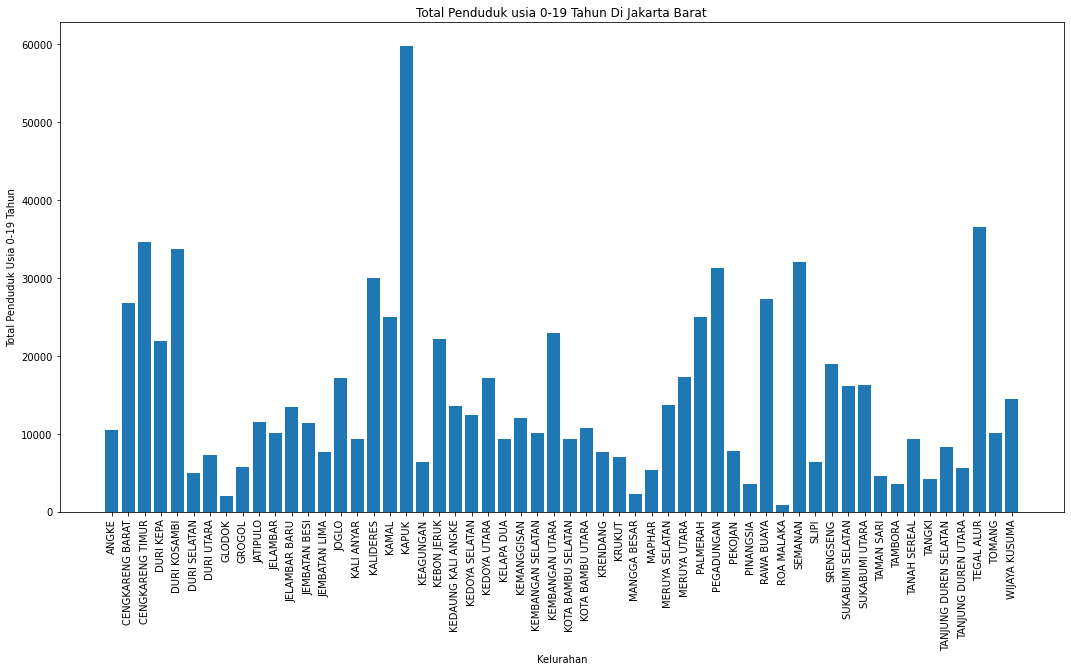

In [ ]:
# Visualisasi dari fungsi diatas
plt.figure(figsize=(18,9))
plt.bar(dfPopJakbar['kelurahan'], dfPopJakbar['total'])
plt.xticks(rotation=90)
plt.xlabel('Kelurahan')
plt.ylabel('Total Penduduk Usia 0-19 Tahun')
plt.title('Total Penduduk usia 0-19 Tahun Di Jakarta Barat')
plt.show()

- Insight : 

---



  - Dari grafik diatas dapat dilihat bahwa kelurahan `Kapuk` menjadi yang tertinggi untuk rentang usia di `0-19` tahun dengan total `59,841` jiwa. Hal ini perlu diperhatikan karena usia tersebut merupakan usia rentan dalam hal penemuan jati diri, sehingga perlu adanya pembinaan yang lebih intensif didaerah tersebut agar tidak terjadi adanya penyalahgunaan oleh pihak yang tidak bertanggung jawab.

# Answer of Question Point 2

---



2. Siapa sajakah kelompok usia di wilayah kecamatan kota Jakarta Selatan dengan jumlah terbanyak? dan tampilkan dalam presentase

In [ ]:
# Query untuk mengelompokan data sesuai nama kota = Jakarta Selatan
dfJaksel = copyDF.loc[copyDF['kota'] == 'JAKARTA SELATAN']
dfJaksel

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
2192,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,00-04,Laki-laki,670
2193,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,05-09,Laki-laki,708
2194,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,01-10,Laki-laki,805
2195,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,15-19,Laki-laki,829
2196,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,20-24,Laki-laki,882
...,...,...,...,...,...,...,...,...
7499,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,55-59,Perempuan,1118
7500,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,60-64,Perempuan,867
7501,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,65-69,Perempuan,555
7502,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,70-74,Perempuan,333


Note : Ada `2,080` baris data untuk wilayah Jakarta Selatan

In [ ]:
# Query untuk mengambil data di kolom 'kecamatan', 'usia', 'gender', 'kelurahan' & total dari dfJaksel
dfKecJaksel = dfJaksel.groupby(['kecamatan', 'usia'])['total'].sum().reset_index()
dfKecJaksel

,kecamatan,usia,total
0,CILANDAK,00-04,14854
1,CILANDAK,01-10,18880
2,CILANDAK,05-09,17902
3,CILANDAK,15-19,18466
4,CILANDAK,20-24,17605
...,...,...,...
155,TEBET,55-59,13853
156,TEBET,60-64,10014
157,TEBET,65-69,6444
158,TEBET,70-74,3802


  - Ada `160` baris data di Jakarta Selatan

In [ ]:
# Check unique value
dfJaksel.kecamatan.unique()

array(['TEBET', 'SETIA BUDI', 'MAMPANG PRAPATAN', 'PASAR MINGGU',
       'KEBAYORAN LAMA', 'CILANDAK', 'KEBAYORAN BARU', 'PANCORAN',
       'JAGAKARSA', 'PESANGGRAHAN'], dtype=object)

  - Berikut pembagian kecamatan di Jakarta Selatan

In [ ]:
# Define fungsi persentase
def jakselPercent(x):
  return (x / dfKecJaksel['total'].sum()) * 100

# Input Value into column Percentage
dfKecJaksel['Percentage'] = dfKecJaksel['total'].apply(jakselPercent)
dfKecJaksel

,kecamatan,usia,total,Percentage
0,CILANDAK,00-04,14854,0.624201
1,CILANDAK,01-10,18880,0.793383
2,CILANDAK,05-09,17902,0.752285
3,CILANDAK,15-19,18466,0.775986
4,CILANDAK,20-24,17605,0.739804
...,...,...,...,...
155,TEBET,55-59,13853,0.582136
156,TEBET,60-64,10014,0.420812
157,TEBET,65-69,6444,0.270792
158,TEBET,70-74,3802,0.159769


In [ ]:
# Fungsi cari nilai maksimum di rentang usia sesuai pertanyaan
maxJaksel=dfKecJaksel.loc[dfKecJaksel['total'].idxmax()]
maxJaksel

kecamatan     JAGAKARSA
usia              40-44
total             32201
Percentage     1.353163
Name: 24, dtype: object

Insight : 

---



  - Kecamatan `Jagakarsa` merupakan kecamatan dengan angka usia di `40-44` terbanyak dengan total `32,201` penduduk. Hal ini memungkinkan karena banyak pada usia tersebut sudah memasuki usia mapan dalam pekerjaan maupun dalam hal pemikiran dan ditambah didaerah `Jagakarsa` masih banyak terdapat hunian dengan harga yang masih relatif terjangkau dan asri sehingga banyak dari penduduk dengan rentang usia tersebut lebih memilih daerah `Jagakarsa` sebagai tempat tinggal.

# Answer of Question Point 3

---



3. Kenapa ada perbedaan jumlah penduduk di Jakarta Pusat dan Jakarta Timur?

In [ ]:
# Query pengelompokan data berdasarkan kota Jakarta Pusat dan Jakarta Timur
dfJakpus = copyDF.loc[copyDF['kota'] == 'JAKARTA PUSAT']
dfJaktim = copyDF.loc[copyDF['kota'] == 'JAKARTA TIMUR']

In [ ]:
# Fungsi total jumlah penduduk
totJakpus = dfJakpus['total'].sum()
totJaktim = dfJaktim['total'].sum()

# cari perbandingan jumlahnya
a = totJakpus / (totJakpus + totJaktim)
b = totJaktim / (totJakpus + totJaktim)

# Print fungsi
print('Jumlah penduduk kota Jakarta Pusat', totJakpus)
print('Jumlah penduduk kota Jakarta Timur', totJaktim)
print('Perbandingan jumlah penduduk Jakarta Pusat dengan Jakarta Timur : ', a)
print('Perbandingan jumlah penduduk Jakarta Timur dengan  Jakarta Pusat : ', b)

Jumlah penduduk kota Jakarta Pusat 1136824
Jumlah penduduk kota Jakarta Timur 3264699
Perbandingan jumlah penduduk Jakarta Pusat dengan Jakarta Timur :  0.2582796909160761
Perbandingan jumlah penduduk Jakarta Timur dengan  Jakarta Pusat :  0.741720309083924


- Insight :

---



  - Data-data diatas menunjukan total populasi penduduk di Jakarta Pusat sebanyak `1,136,824` jiwa dan di Jakarta Timur sebanyak `3,264,699` jiwa. Terdapat selisih yang cukup jauh yaitu `2,127,875` atau hampir 2 kali lipat selisihnya dibanding dengan total penduduk di Jakarta Pusat. Harga tanah dan bangunan yang cukup mahal diwilayah Jakarta Pusat merupakan salah satu alasan mengapa jumlah penduduk di Jakarta Pusat hanya sedikit, disamping itu ketersedian lahan yang semakin sedikit untuk dijadikan tempat tinggal juga ditengarai menjadi salah satu penyebabnya ditambah Jakarta Pusat juga merupakan daerah dengan kawasan bisnis. Sementara untuk wilayah Jakarta Timur masih terdapat lahan yang cukup untuk dijadikan tempat tinggal sehingga populasi penduduk disana cukup banyak.

# Answer of Question Point 4

---



4. Tahun berapa data Jumlah penduduk ini diambil?

In [ ]:
# Define fungsi
copyDF.tahun.max()

2021

- Insight :

---



  - Data kependudukan ini hanya diambil untuk tahun 2021 di wilayah provinsi `DKI Jakarta`.

# Answer of Question Point 5

---



5. Apakah di rentang usia Sekolah Menengah Atas atau di kisaran 15-19 tahun di kecamatan `Penjaringan` dengan kecamatan `Pademangan` sama jumlah penduduknya? (Statistika Inferential)

  > Hypothesis

  >  1. H0 : Total Penduduk Usia SMA di Penjaringan = Total Penduduk Usia SMA di Pademangan
  >  2. H1 : Total Penduduk Usia SMA di Penjaringan != Total Penduduk Usia SMA di Pademangan

In [ ]:
# Define fungsi ambil data di Jakarta Utara
dfJakut = copyDF.loc[copyDF['kota'] == 'JAKARTA UTARA']
dfJakut

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
800,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,00-04,Laki-laki,4587
801,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,05-09,Laki-laki,5403
802,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,01-10,Laki-laki,5328
803,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,15-19,Laki-laki,4728
804,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,20-24,Laki-laki,4486
...,...,...,...,...,...,...,...,...
5563,2021,DKI Jakarta,JAKARTA UTARA,KELAPA GADING,KELAPA GADING BARAT,55-59,Perempuan,1225
5564,2021,DKI Jakarta,JAKARTA UTARA,KELAPA GADING,KELAPA GADING BARAT,60-64,Perempuan,887
5565,2021,DKI Jakarta,JAKARTA UTARA,KELAPA GADING,KELAPA GADING BARAT,65-69,Perempuan,755
5566,2021,DKI Jakarta,JAKARTA UTARA,KELAPA GADING,KELAPA GADING BARAT,70-74,Perempuan,591


Note : ada `992` data di wilayah kota Jakarta Utara

In [ ]:
# Check Kecamatan
dfJakut.kecamatan.unique()

array(['PENJARINGAN', 'TANJUNG PRIOK', 'KOJA', 'CILINCING', 'PADEMANGAN',
       'KELAPA GADING'], dtype=object)

  - Berikut pembagian kecamatan di Kota Jakarta Utara

In [ ]:
# Get data only Kecamatan = Penjaringan
dfPenjaringan = dfJakut[dfJakut['kecamatan'] == 'PENJARINGAN']
dfPenjaringan

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
800,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,00-04,Laki-laki,4587
801,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,05-09,Laki-laki,5403
802,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,01-10,Laki-laki,5328
803,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,15-19,Laki-laki,4728
804,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,20-24,Laki-laki,4486
...,...,...,...,...,...,...,...,...
5147,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,55-59,Perempuan,1504
5148,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,60-64,Perempuan,1568
5149,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,65-69,Perempuan,1409
5150,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,70-74,Perempuan,964


In [ ]:
#  Get data only Kecamatan = Pademangan
dfPademangan = dfJakut[dfJakut['kecamatan'] == 'PADEMANGAN']
dfPademangan

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
1200,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,00-04,Laki-laki,1544
1201,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,05-09,Laki-laki,1922
1202,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,01-10,Laki-laki,1805
1203,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,15-19,Laki-laki,1754
1204,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,20-24,Laki-laki,1661
...,...,...,...,...,...,...,...,...
5515,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,55-59,Perempuan,745
5516,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,60-64,Perempuan,506
5517,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,65-69,Perempuan,290
5518,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,70-74,Perempuan,192


In [ ]:
# Fungsi Filter by usia = 15-19 data Penjaringan
dfSMAPenj = dfPenjaringan[dfPenjaringan['usia'] == '15-19']
dfSMAPenj

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
803,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,15-19,Laki-laki,4728
819,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,15-19,Laki-laki,667
835,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,15-19,Laki-laki,1892
851,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PEJAGALAN,15-19,Laki-laki,3388
867,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,15-19,Laki-laki,1868
5075,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PENJARINGAN,15-19,Perempuan,4548
5091,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,15-19,Perempuan,643
5107,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,15-19,Perempuan,1607
5123,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PEJAGALAN,15-19,Perempuan,3260
5139,2021,DKI Jakarta,JAKARTA UTARA,PENJARINGAN,PLUIT,15-19,Perempuan,1731


In [ ]:
# Fungsi Filter by usia = 15-19 data Pademangan
dfSMAPad = dfPademangan[dfPademangan['usia'] == '15-19']
dfSMAPad

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
1203,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,15-19,Laki-laki,1754
1219,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN BARAT,15-19,Laki-laki,3875
1235,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,15-19,Laki-laki,1279
5475,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN TIMUR,15-19,Perempuan,1647
5491,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,PADEMANGAN BARAT,15-19,Perempuan,3503
5507,2021,DKI Jakarta,JAKARTA UTARA,PADEMANGAN,ANCOL,15-19,Perempuan,1160


In [ ]:
# Fungsi cari T-Test & P-Value
tstat, pvalue = stats.ttest_ind(dfSMAPenj['total'], dfSMAPad['total'])

# Print Value
print('T-Stat Value \t : ', tstat)
print('P-Value \t : ', pvalue)

T-Stat Value 	 :  0.3247242489353279
P-Value 	 :  0.7501911207321765


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


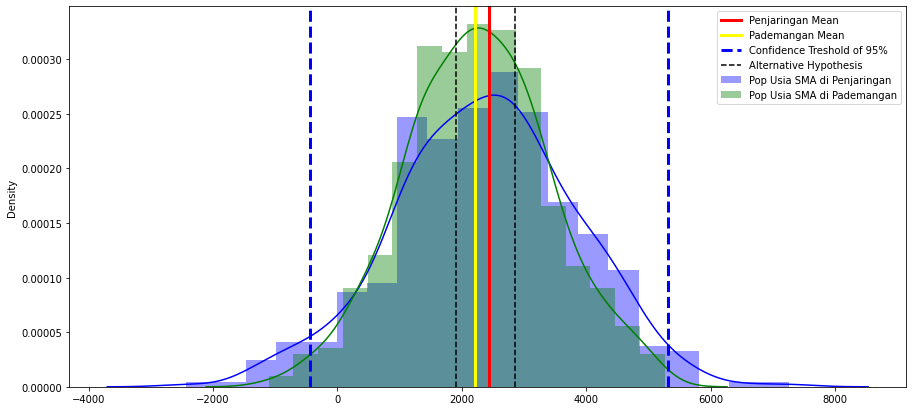

In [ ]:
# Data Visualization

# Fungsi std deviasi data Penjaringan dan Pademangan
popPenjaringan = np.random.normal(dfSMAPenj['total'].mean(), dfSMAPenj['total'].std(), 500)
popPademangan = np.random.normal(dfSMAPad['total'].mean(), dfSMAPad['total'].std(), 500)


# Fungsi Confidence Interval
ci = stats.norm.interval(0.95, dfSMAPenj['total'].mean(), dfSMAPenj['total'].std())

# Plot to Distribution Visualization
plt.figure(figsize=(15,7))
sns.distplot(popPenjaringan, label='Pop Usia SMA di Penjaringan', color='blue')
sns.distplot(popPademangan, label='Pop Usia SMA di Pademangan', color='green')

plt.axvline(dfSMAPenj['total'].mean(), color='red', linewidth=3, label='Penjaringan Mean')
plt.axvline(dfSMAPad['total'].mean(), color='yellow', linewidth=3, label='Pademangan Mean')

plt.axvline(ci[1], color='blue', linestyle='dashed', linewidth=3, label='Confidence Treshold of 95%')
plt.axvline(ci[0], color='blue', linestyle='dashed', linewidth=3)

plt.axvline(popPenjaringan.mean() + tstat * popPenjaringan.std(), color='black', linestyle='dashed', label='Alternative Hypothesis')
plt.axvline(popPenjaringan.mean() - tstat * popPenjaringan.std(), color='black', linestyle='dashed')

plt.legend()

  - Insight : 

---
  - Dari analisa diatas maka dapat disimpulkan bahwa kita dapat menolak H0 : Total Penduduk Usia SMA di Penjaringan = Total Penduduk Usia SMA di Pademangan karena berdasarkan grafik diatas untuk total penduduk usia 15-19 di `Penjaringan` dan `Pademangan` tersebut karena terdapat selisih yang cukup signifikan diantara keduanya yaitu sebesar `11,114` jiwa.


# Answer of Question Point 6

---



6. Bagaimana perbandingan jumlah penduduk di rentang usia 15 sampai dengan 64 tahun di Kota Jakarta Selatan & Jakarta Timur? (Statistika Deskripsi)


In [ ]:
# Panggil Fungsi Filter Jakarta Selatan
dfJaksel

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
2192,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,00-04,Laki-laki,670
2193,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,05-09,Laki-laki,708
2194,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,01-10,Laki-laki,805
2195,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,15-19,Laki-laki,829
2196,2021,DKI Jakarta,JAKARTA SELATAN,TEBET,TEBET TIMUR,20-24,Laki-laki,882
...,...,...,...,...,...,...,...,...
7499,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,55-59,Perempuan,1118
7500,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,60-64,Perempuan,867
7501,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,65-69,Perempuan,555
7502,2021,DKI Jakarta,JAKARTA SELATAN,PESANGGRAHAN,ULUJAMI,70-74,Perempuan,333


  - Ada `2,080` data di dalam Jakarta Selatan

In [ ]:
# Panggil Fungsi Filter Jakarta Timur
dfJaktim

,tahun,provinsi,kota,kecamatan,kelurahan,usia,gender,total
3232,2021,DKI Jakarta,JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,00-04,Laki-laki,1413
3233,2021,DKI Jakarta,JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,05-09,Laki-laki,1675
3234,2021,DKI Jakarta,JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,01-10,Laki-laki,1654
3235,2021,DKI Jakarta,JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,15-19,Laki-laki,1649
3236,2021,DKI Jakarta,JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,20-24,Laki-laki,1608
...,...,...,...,...,...,...,...,...
8539,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,55-59,Perempuan,527
8540,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,60-64,Perempuan,410
8541,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,65-69,Perempuan,279
8542,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,70-74,Perempuan,128


  - Ada `2,080` data di dalam Jakarta Timur

In [ ]:
# Fungsi Filter usia, jenis kelamin & total penduduk di data Jakarta Selatan
dfGroupJaksel = dfJaksel.groupby(['usia', 'gender'])['total'].sum().reset_index()
dfGroupJaksel

,usia,gender,total
0,00-04,Laki-laki,86525
1,00-04,Perempuan,81352
2,01-10,Laki-laki,102080
3,01-10,Perempuan,96976
4,05-09,Laki-laki,101225
5,05-09,Perempuan,95183
6,15-19,Laki-laki,95602
7,15-19,Perempuan,90723
8,20-24,Laki-laki,92935
9,20-24,Perempuan,89588


In [ ]:
# Fungsi Filter usia, jenis kelamin & total penduduk di data Jakarta Timur
dfGroupJaktim = dfJaktim.groupby(['usia', 'gender'])['total'].sum().reset_index()
dfGroupJaktim

,usia,gender,total
0,00-04,Laki-laki,128498
1,00-04,Perempuan,119811
2,01-10,Laki-laki,145020
3,01-10,Perempuan,135744
4,05-09,Laki-laki,145927
5,05-09,Perempuan,136731
6,15-19,Laki-laki,129629
7,15-19,Perempuan,123083
8,20-24,Laki-laki,128680
9,20-24,Perempuan,123023


In [ ]:
# Fungsi filter usia 15-64 Jakarta Selatan
dfUsiaJaksel = dfGroupJaksel[(dfGroupJaksel['usia'] >= '15-19') & (dfGroupJaksel['usia'] <= '60-64')]
dfUsiaJaksel

,usia,gender,total
6,15-19,Laki-laki,95602
7,15-19,Perempuan,90723
8,20-24,Laki-laki,92935
9,20-24,Perempuan,89588
10,25-29,Laki-laki,88220
11,25-29,Perempuan,90995
12,30-34,Laki-laki,86607
13,30-34,Perempuan,91512
14,35-39,Laki-laki,99067
15,35-39,Perempuan,103274


In [ ]:
# Fungsi filter usia 15-64 Jakarta Timur
dfUsiaJaktim = dfGroupJaktim[(dfGroupJaktim['usia'] >= '15-19') & (dfGroupJaktim['usia'] <= '60-64')]
dfUsiaJaktim

,usia,gender,total
6,15-19,Laki-laki,129629
7,15-19,Perempuan,123083
8,20-24,Laki-laki,128680
9,20-24,Perempuan,123023
10,25-29,Laki-laki,124095
11,25-29,Perempuan,129048
12,30-34,Laki-laki,125188
13,30-34,Perempuan,128967
14,35-39,Laki-laki,141706
15,35-39,Perempuan,143769


In [ ]:
volJakSel = dfUsiaJaksel.total.sum()
volJakSel

1693868

  - Note : Jumlah penduduk di Jakarta Selatan dengan rentang usia `15-64` sebanyak `1,693,868` jiwa.

In [ ]:
volJakTim = dfUsiaJaktim.total.sum()
volJakTim

2299745

  - Note : Jumlah penduduk di Jakarta Timur dengan rentang usia `15-64` sebanyak `2,299,745` jiwa

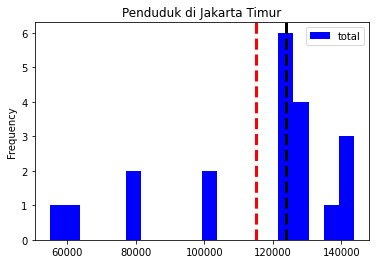

In [ ]:
# Distribusi data Jakarta Timur
dfUsiaJaktim.plot.hist(title = 'Penduduk di Jakarta Timur', color='blue', bins=20)
plt.axvline(dfUsiaJaktim['total'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(dfUsiaJaktim['total'].median(), color='black', linestyle='dashed', linewidth=3)
plt.show()

  - Skewness is negative because mean < median

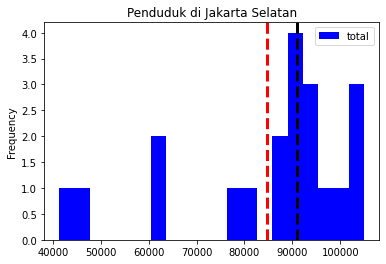

In [ ]:
# Distribusi data Jakarta Selatan
dfUsiaJaksel.plot.hist(title = 'Penduduk di Jakarta Selatan', color='blue', bins=20)
plt.axvline(dfUsiaJaksel['total'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(dfUsiaJaksel['total'].median(), color='black', linestyle='dashed', linewidth=3)
plt.show()

  - Skewness is negative because mean < median

In [ ]:
print('Skewness di Jakarta Selatan :', dfUsiaJaksel['total'].skew())
print('Skewness di Jakarta Timur : ', dfUsiaJaktim['total'].skew())

Skewness di Jakarta Selatan : -1.333816111223149
Skewness di Jakarta Timur :  -1.2124605433950564


  - dari 2 data nilai skewnessnya masih dalam range normal yaitu diantara -2 s/d 2

  - Find Percentile & Quartile

---



In [ ]:
# Define Percentile & Quartile di Jakarta Timur
quartJaktim = percentile(dfUsiaJaktim['total'], [25, 50, 75])
minJaktim, maxJaktim = dfUsiaJaktim['total'].min(), dfUsiaJaktim['total'].max()

qJaktim0 = quartJaktim[0]
qJaktim1 = quartJaktim[1]
qJaktim2 = quartJaktim[2]

print('Max dari Data Jakarta Timur \t\t: ', maxJaktim)
print('Quartile 0 dari Data Jakarta Timur \t: ', qJaktim0)
print('Quartile 1 dari Data Jakarta Timur \t: ', qJaktim1)
print('Quartile 2 dari Data Jakarta Timur \t: ', qJaktim2)
print('Min dari Data Jakarta Timur \t\t: ', minJaktim)

Max dari Data Jakarta Timur 		:  143769
Quartile 0 dari Data Jakarta Timur 	:  103042.75
Quartile 1 dari Data Jakarta Timur 	:  123975.5
Quartile 2 dari Data Jakarta Timur 	:  129193.25
Min dari Data Jakarta Timur 		:  54869


In [ ]:
# Define Percentile & Quartile di Jakarta Selatan
quartJaksel = percentile(dfUsiaJaksel['total'], [25, 50, 75])
minJaksel, maxJaksel = dfUsiaJaksel['total'].min(), dfUsiaJaksel['total'].max()

qJaksel0 = quartJaksel[0]
qJaksel1 = quartJaksel[1]
qJaksel2 = quartJaksel[2]

print('Max dari Data Jakarta Selatan \t\t: ', maxJaksel)
print('Quartile 0 dari Data Jakarta Selatan \t: ', qJaksel0)
print('Quartile 1 dari Data Jakarta Selatan \t: ', qJaksel1)
print('Quartile 2 dari Data Jakarta Selatan \t: ', qJaksel2)
print('Min dari Data Jakarta Selatan \t\t: ', minJaksel)

Max dari Data Jakarta Selatan 		:  104894
Quartile 0 dari Data Jakarta Selatan 	:  80475.0
Quartile 1 dari Data Jakarta Selatan 	:  90859.0
Quartile 2 dari Data Jakarta Selatan 	:  95033.5
Min dari Data Jakarta Selatan 		:  41399


In [ ]:
# Fungsi nilai Extreme di data Jakarta Timur
IQRJaktim = qJaktim2 - qJaktim0
upperJaktim = qJaktim2 + 1.5 * IQRJaktim
lowerJaktim = qJaktim0 - 1.5 * IQRJaktim

# Print Value
print('Nilai Extreme dari data Jakarta Timur \t: ', IQRJaktim)
print('Nilai Upper dari data Jakarta Timur \t: ', upperJaktim)
print('Nilai Lower dari data Jakarta Timur \t: ', lowerJaktim)

Nilai Extreme dari data Jakarta Timur 	:  26150.5
Nilai Upper dari data Jakarta Timur 	:  168419.0
Nilai Lower dari data Jakarta Timur 	:  63817.0


In [ ]:
# Fungsi nilai Extreme di data Jakarta Selatan
IQRJaksel = qJaksel2 - qJaksel0
upperJaksel = qJaksel2 + 1.5 * IQRJaksel
lowerJaksel = qJaksel0 - 1.5 * IQRJaksel

# Print Value
print('Nilai Extreme dari data Jakarta Selatan : ', IQRJaksel)
print('Nilai Upper dari data Jakarta Selatan \t: ', upperJaksel)
print('Nilai Lower dari data Jakarta Selatan \t: ', lowerJaksel)

Nilai Extreme dari data Jakarta Selatan :  14558.5
Nilai Upper dari data Jakarta Selatan 	:  116871.25
Nilai Lower dari data Jakarta Selatan 	:  58637.25


In [ ]:
# Check outlier data Jakarta Timur
dfUsiaJaktim.loc[dfUsiaJaktim['total'] > upperJaktim] 

,usia,gender,total


  - Note : Tidak ada outlier di Jakarta Timur

In [ ]:
# Check outlier data Jakarta Selatan
dfUsiaJaksel.loc[dfUsiaJaksel['total'] > upperJaksel]

,usia,gender,total


  - Note : Tidak ada outlier di Jakarta Selatan

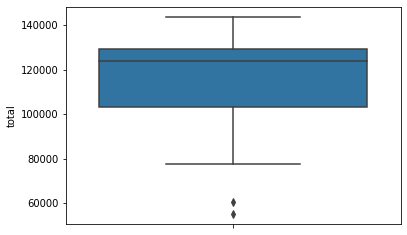

In [ ]:
# Jakarta Timur Outlier Visualization
sns.boxplot(data=dfUsiaJaktim, y='total')

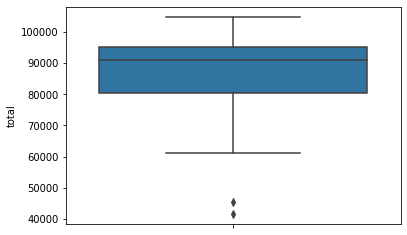

In [ ]:
# Jakarta Selatan Outlier Jakarta Selatan
sns.boxplot(data=dfUsiaJaksel, y='total')

  - Pengukuran Range, Standard Deviasi dan Variansi

---



In [ ]:
# Cari nilai Mean, Median dan Modus data Jakarta Timur
meanJaktim = dfUsiaJaktim['total'].mean()
medJaktim = dfUsiaJaktim['total'].median()
modJaktim = dfUsiaJaktim['total'].mode()

# Print Value
print('Nilai Mean dari data Jakarta Timur \t: ', meanJaktim)
print('Nilai Median dari data Jakarta Timur \t: ', medJaktim)
print('Nilai Modus dari data Jakarta Timur\t\n', modJaktim)

Nilai Mean dari data Jakarta Timur 	:  114987.25
Nilai Median dari data Jakarta Timur 	:  123975.5
Nilai Modus dari data Jakarta Timur	
 0      54869
1      60328
2      77671
3      79854
4     101146
5     103675
6     122822
7     123023
8     123083
9     123856
10    124095
11    125188
12    128680
13    128967
14    129048
15    129629
16    137942
17    140394
18    141706
19    143769
dtype: int64


In [ ]:
# Cari nilai Mean, Median dan Modus data Jakarta Selatan
meanJaksel = dfUsiaJaksel['total'].mean()
medJaksel = dfUsiaJaksel['total'].median()
modJaksel = dfUsiaJaksel['total'].mode()

# Print Value
print('Nilai Mean dari data Jakarta Selatan \t: ', meanJaksel)
print('Nilai Median dari data Jakarta Selatan \t: ', medJaksel)
print('Nilai Modus dari data Jakarta Selatan\t\n ', modJaksel)

Nilai Mean dari data Jakarta Selatan 	:  84693.4
Nilai Median dari data Jakarta Selatan 	:  90859.0
Nilai Modus dari data Jakarta Selatan	
  0      41399
1      45364
2      61201
3      61656
4      78378
5      81174
6      86607
7      88220
8      89588
9      90723
10     90995
11     91512
12     92935
13     94349
14     94844
15     95602
16     99067
17    102086
18    103274
19    104894
dtype: int64


In [ ]:
# Cari nilai Variansi & Standard Deviasi dari Jakarta Timur
varJaktim = dfUsiaJaktim['total'].var()
stdJaktim = dfUsiaJaktim['total'].std()

# Print Value
print('Nilai Variansi data Jakarta Timur : ', varJaktim)
print('Nilai Variansi data Jakarta Timur : ', stdJaktim)

Nilai Variansi data Jakarta Timur :  711321369.9868422
Nilai Variansi data Jakarta Timur :  26670.608729214302


In [ ]:
# Cari nilai Variansi & Standard Deviasi dari Jakarta Selatan
varJaksel = dfUsiaJaksel['total'].var()
stdJaksel = dfUsiaJaksel['total'].std()

# Print Value
print('Nilai Variansi data Jakarta Selatan : ', varJaksel)
print('Nilai Variansi data Jakarta Selatan : ', stdJaksel)

Nilai Variansi data Jakarta Selatan :  334963156.67368424
Nilai Variansi data Jakarta Selatan :  18301.998707072522


In [ ]:
# Fungsi Interval Confidence antara Jakarta Timur dan Jakarta Selatan
ci = stats.norm.interval(0.95, dfUsiaJaktim['total'].mean(), dfUsiaJaksel['total'].std())

# Print Fungsi
print('Interval Confidence C[0] : ', ci[0])
print('Interval Confidence C[1] : ', ci[1])

Interval Confidence C[0] :  79115.99168903922
Interval Confidence C[1] :  150858.50831096078


  - Analysis Uji Hypothesis

---



  1. H0 = μ Jumlah Penduduk `Usia Produktif` Jakarta Selatan = μ Jumlah Penduduk `Usia Produktif` Jakarta Timur
  2. H1 = μ Jumlah Penduduk `Usia Produktif` Jakarta Selatan != μ Jumlah Penduduk `Usia Produktif` Jakarta Timur

  > Akan kita uji *Hypothesis* tersebut dengan menggunakan T-test

In [ ]:
# Define Function tTest & pValue
tTest, pValue = stats.ttest_ind(dfUsiaJaksel['total'], dfUsiaJaktim['total'])

# Print Value
print('Nilai T-Test \t: ', tTest)
print('Nilai P-Value \t: ', pValue)

Nilai T-Test 	:  -4.188365438039945
Nilai P-Value 	:  0.000160847016799406


Confidence Interval C-0 :  32419.967444980386
Confidence Interval C-1 :  136966.8325550196


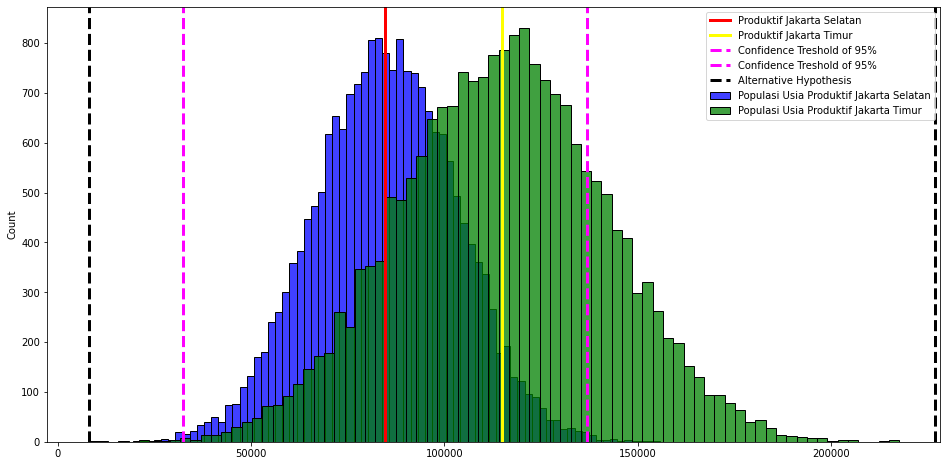

In [ ]:
# Random Sampel Jumlah Penduduk di 2 kota tersebut
popJaksel = np.random.normal(dfUsiaJaksel['total'].mean(), dfUsiaJaksel['total'].std(), 20000)
popJaktim = np.random.normal(dfUsiaJaktim['total'].mean(), dfUsiaJaktim['total'].std(), 20000)

# Confidence Interval
ci = stats.norm.interval(0.95, dfUsiaJaksel['total'].mean(), dfUsiaJaktim['total'].std())

# Data Visualization
plt.figure(figsize=(16, 8))
sns.histplot(popJaksel, label='Populasi Usia Produktif Jakarta Selatan', color='blue')
sns.histplot(popJaktim, label='Populasi Usia Produktif Jakarta Timur', color='green')

plt.axvline(dfUsiaJaksel.total.mean(), color='red', linewidth=3, label='Produktif Jakarta Selatan')
plt.axvline(dfUsiaJaktim.total.mean(), color='yellow', linewidth=3, label='Produktif Jakarta Timur')
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3, label='Confidence Treshold of 95%')
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3, label='Confidence Treshold of 95%')

plt.axvline(popJaksel.mean() + tTest * popJaksel.std(), color='black', linestyle='dashed', linewidth=3, label='Alternative Hypothesis')
plt.axvline(popJaktim.mean() - tTest * popJaktim.std(), color='black', linestyle='dashed', linewidth=3)

plt.legend()
print('Confidence Interval C-0 : ', ci[0])
print('Confidence Interval C-1 : ', ci[1])

  - Insight : 

---
  - Berdasarkan hasil uji analisis diatas dapat disimpulkan bahwa kita menolak `H0`, karena jumlah penduduk di usia produktif di Jakarta Selatan tidak sama dengan jumlah penduduk usia produktif di Jakarta Timur. Hal ini disebabkan dari beberapa hal, semisal banyaknya usia produktif di Jakarta Selatan yang sudah pindah alamat ke daerah lain dan juga mungkin banyaknya kesempatan pekerjaan di daerah Jakarta Timur lebih besar sehingga banyaknya penduduk usia produktif didaerah Jakarta Timur. 


# Conclusion

---



In [ ]:
# Fungsi Filter & grouping by kota
dfKota = copyDF.groupby(['kota', 'usia', 'gender'])['total'].sum().reset_index()

# Fungsi grouping base in usia produktif 15-64 tahun
dfProd = dfKota.loc[(dfKota['usia'] >= '15-19') & (dfKota['usia'] <= '65-69')]

# Summary jumlah penduduk berdasarkan kota dan gender
proGender = dfProd.groupby(['kota', 'gender'])['total'].sum().reset_index()

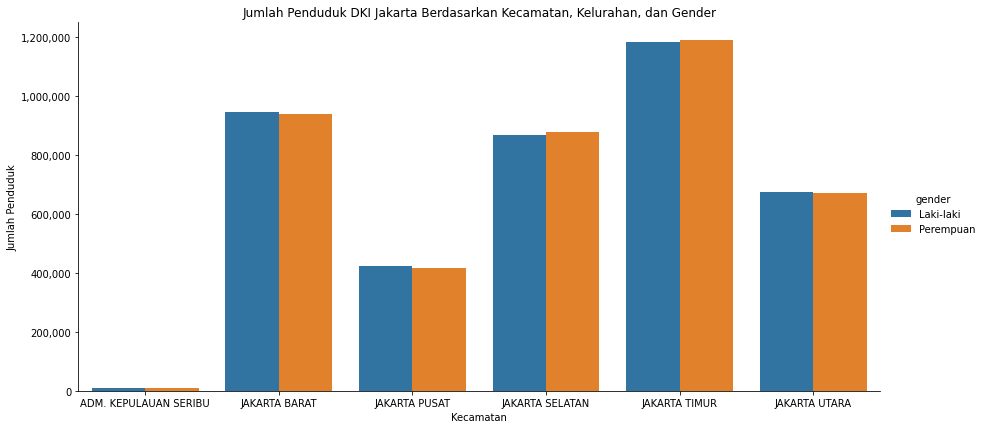

In [ ]:
# Data Visualization untuk usia produktif 15-64 tahun di semua wilayah DKI Jakarta berdasarkan Gender
sns.catplot(x='kota', y='total', hue='gender', kind='bar', data=proGender, height=6, aspect=2)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Jumlah Penduduk DKI Jakarta Berdasarkan Kecamatan, Kelurahan, dan Gender')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Penduduk')
plt.show()

> Kesimpulan yang dapat diambil dari penjabaran masalah diatas adalah 
  1. Untuk Topik utama yang dibahas yaitu `Bagaimana Penyebaran Rentang Usia Produktif yaitu antara 15-64 tahun di masing-masing wilayah berdasarkan Gender` sudah tersaji dari tabel diatas yang mana untuk Kota **Jakarta Timur** total penduduk terbanyak dengan jumlah laki-laki sebanyak `1,183,868` jiwa dan wanita sebanyak `1,191,218` jiwa. Sedangkan untuk Kota `ADM. KEPULAUAN SERIBU` total penduduk terendah dengan jumlah laki-laki `10,450` jiwa dan wanita `10,280`. Penduduk di `ADM. KEPULAUAN SERIBU` menjadi yang terendah karena salah satu alasannya adalah faktor *Geografis* yang terdiri dari beberapa pulau kecil. Perbandingan Jumlah Penduduk per Jenis Kelamin dari keenam kota di DKI Jakarta tidak terlalu signifikan perbedaannya dan hampir sama rata.
  2. Untuk perbandingan jumlah penduduk usia sekolah menengah atas (15-19 tahun) di daerah *Penjaringan* dan *Pademangan* cukup signifikan berbeda. yaitu sebanyak `24,332` jiwa untuk daerah *Penjaringan* dan `13,218` untuk daerah *Pademangan* dan selisihnya adalah `11,114` jiwa. Sehingga mungkin untuk jumlah sekolah menengah atas di daerah *Penjaringan* diperlukan lebih banyak lagi untuk menampung para murid yang akan melanjutkan sekolah menengah atas. Diperlukan juga andil dari pihak Dinas Sosial untuk dapat rutin memberikan penyuluhan kepada range usia tersebut, karena gejolak jiwa muda ditahun tersebut terkadang memberikan dampak negatif jika tidak dibina dengan baik.



---



In [ ]:
# Export data CSV to Local for Visualization in Tableu
filepath = Path('folder/subfolder/DataPendudukPerTahun2021.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
copyDF.to_csv(filepath)